<a href="https://www.kaggle.com/code/eniolaogunloye/creation-of-bank-dataset-and-ead?scriptVersionId=195929552" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from faker import Faker
fake = Faker()

In [4]:
import pandas as pd
from faker import Faker

fake = Faker()
num_rows = 10000

data = {
    'Customer ID': [fake.random_int(min=1000, max=9999) for _ in range(num_rows)],
    'Name': [fake.name() for _ in range(num_rows)],
    'Email': [fake.email() for _ in range(num_rows)],
    'Phone': [fake.phone_number() for _ in range(num_rows)],
    'AccountBalance': [round(fake.random_number(digits=5), 2) for _ in range(num_rows)],
    'AccountType': [fake.random_element(elements=('Savings', 'Checking', 'Business')) for _ in range(num_rows)],
    'DateOpened': [fake.date_between(start_date='-10y', end_date='today') for _ in range(num_rows)],
    'LastTransactionDate': [fake.date_between(start_date='-1y', end_date='today') for _ in range(num_rows)],
    'IsActive': [fake.random_element(elements=(True, False)) for _ in range(num_rows)],
}

bank_data = pd.DataFrame(data)
print(bank_data.head())

# Save to CSV
bank_data.to_csv('synthetic_bank_data.csv', index=False)


   Customer ID            Name                           Email  \
0         5422  Nichole Wilcox            groberts@example.org   
1         7548       Paul Lamb         arnoldmaria@example.org   
2         4358      Scott Lane              tara48@example.net   
3         7912     Stacey Rose  washingtontheodore@example.com   
4         6939  Matthew Miller            latoya52@example.com   

                  Phone  AccountBalance AccountType  DateOpened  \
0      880.972.7530x127           18105     Savings  2021-01-15   
1   +1-846-713-3443x857           72772    Checking  2020-04-18   
2     500.207.3315x7645            8057     Savings  2022-05-15   
3          976-228-5966           69064    Business  2020-02-25   
4  +1-490-615-5678x0888           35192    Checking  2023-12-14   

  LastTransactionDate  IsActive  
0          2024-03-01     False  
1          2024-02-19     False  
2          2023-12-17      True  
3          2023-11-18     False  
4          2024-01-13      Tru

In [5]:
bank_data.head()

,Customer ID,Name,Email,Phone,AccountBalance,AccountType,DateOpened,LastTransactionDate,IsActive
0,5422,Nichole Wilcox,groberts@example.org,880.972.7530x127,18105,Savings,2021-01-15,2024-03-01,False
1,7548,Paul Lamb,arnoldmaria@example.org,+1-846-713-3443x857,72772,Checking,2020-04-18,2024-02-19,False
2,4358,Scott Lane,tara48@example.net,500.207.3315x7645,8057,Savings,2022-05-15,2023-12-17,True
3,7912,Stacey Rose,washingtontheodore@example.com,976-228-5966,69064,Business,2020-02-25,2023-11-18,False
4,6939,Matthew Miller,latoya52@example.com,+1-490-615-5678x0888,35192,Checking,2023-12-14,2024-01-13,True


In [6]:
summary_stats = bank_data.describe()
print(summary_stats)

        Customer ID  AccountBalance
count  10000.000000    10000.000000
mean    5513.363100    49652.286100
std     2599.547651    28946.604619
min     1001.000000        3.000000
25%     3289.000000    24597.000000
50%     5490.000000    49386.500000
75%     7764.250000    74500.750000
max     9999.000000    99994.000000


In [7]:
# Check for missing values
missing_values = bank_data.isnull().sum()
print(missing_values)


Customer ID            0
Name                   0
Email                  0
Phone                  0
AccountBalance         0
AccountType            0
DateOpened             0
LastTransactionDate    0
IsActive               0
dtype: int64


In [8]:
# Count of customers by Account Type
account_type_counts = bank_data['AccountType'].value_counts()
print(account_type_counts)


AccountType
Checking    3410
Business    3347
Savings     3243
Name: count, dtype: int64


In [9]:
# Assuming bank_data is already loaded
bins = [0, 1000, 5000, 10000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']  # Added a fourth label

# Segment customers based on Account Balance
bank_data['BalanceSegment'] = pd.cut(bank_data['AccountBalance'], bins=bins, labels=labels)

# Count of customers in each segment
balance_segment_counts = bank_data['BalanceSegment'].value_counts()
print(balance_segment_counts)


BalanceSegment
Very High    8951
High          528
Medium        419
Low           102
Name: count, dtype: int64


In [10]:
# Convert DateOpened to datetime
bank_data['DateOpened'] = pd.to_datetime(bank_data['DateOpened'])

# Count of accounts opened per year
accounts_per_year = bank_data['DateOpened'].dt.year.value_counts().sort_index()
print(accounts_per_year)

DateOpened
2014     329
2015     983
2016    1019
2017     905
2018     983
2019    1058
2020    1008
2021     996
2022    1018
2023    1005
2024     696
Name: count, dtype: int64


In [11]:
# Convert LastTransactionDate to datetime
bank_data['LastTransactionDate'] = pd.to_datetime(bank_data['LastTransactionDate'])

# Calculate the frequency of transactions
bank_data['TransactionFrequency'] = (pd.to_datetime('today') - bank_data['LastTransactionDate']).dt.days
print(bank_data[['Customer ID', 'TransactionFrequency']].head())


   Customer ID  TransactionFrequency
0         5422                   192
1         7548                   203
2         4358                   267
3         7912                   296
4         6939                   240


In [12]:
# Count of active vs inactive customers
active_counts = bank_data['IsActive'].value_counts()
print(active_counts)

IsActive
True     5039
False    4961
Name: count, dtype: int64


In [13]:
# Analyze inactive customers
inactive_customers = bank_data[bank_data['IsActive'] == False]
print(inactive_customers.head())


   Customer ID                  Name                           Email  \
0         5422        Nichole Wilcox            groberts@example.org   
1         7548             Paul Lamb         arnoldmaria@example.org   
3         7912           Stacey Rose  washingtontheodore@example.com   
6         6736  Christopher Stephens            curtis97@example.net   
7         9575          Kenneth Lane       brendanjuarez@example.net   

                  Phone  AccountBalance AccountType DateOpened  \
0      880.972.7530x127           18105     Savings 2021-01-15   
1   +1-846-713-3443x857           72772    Checking 2020-04-18   
3          976-228-5966           69064    Business 2020-02-25   
6      556-293-0080x356           58235     Savings 2024-05-18   
7  +1-310-240-2420x8392            7500    Business 2019-11-01   

  LastTransactionDate  IsActive BalanceSegment  TransactionFrequency  
0          2024-03-01     False      Very High                   192  
1          2024-02-19     Fa

In [14]:
# Correlation between Account Type and Account Balance
correlation = bank_data.groupby('AccountType')['AccountBalance'].mean()
print(correlation)


AccountType
Business    49730.511802
Checking    49435.533138
Savings     49799.466543
Name: AccountBalance, dtype: float64


In [15]:
# Correlation between Last Transaction Date and Account Balance
bank_data['DaysSinceLastTransaction'] = (pd.to_datetime('today') - bank_data['LastTransactionDate']).dt.days
correlation_activity = bank_data[['DaysSinceLastTransaction', 'AccountBalance']].corr()
print(correlation_activity)


                          DaysSinceLastTransaction  AccountBalance
DaysSinceLastTransaction                  1.000000       -0.001068
AccountBalance                           -0.001068        1.000000


In [16]:
# Check for uniqueness of Customer IDs
unique_ids = bank_data['Customer ID'].is_unique
print(f"Are Customer IDs unique? {unique_ids}")

Are Customer IDs unique? False


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


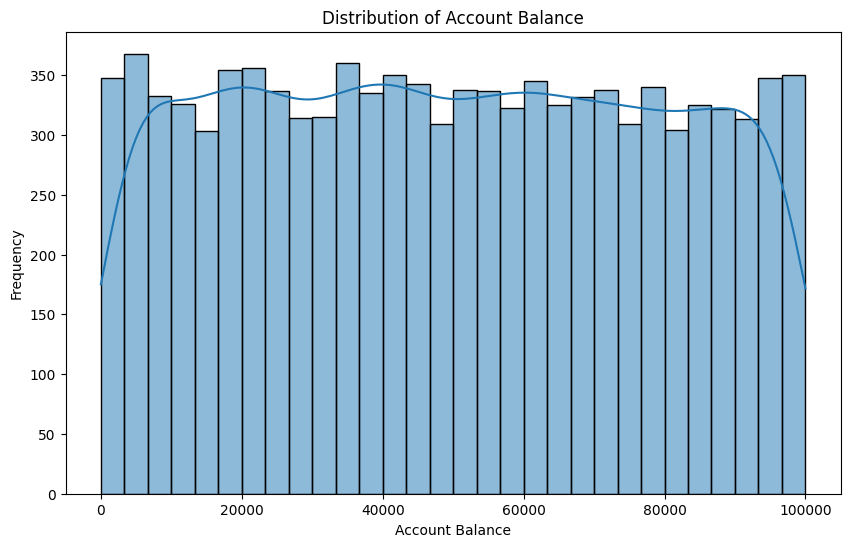

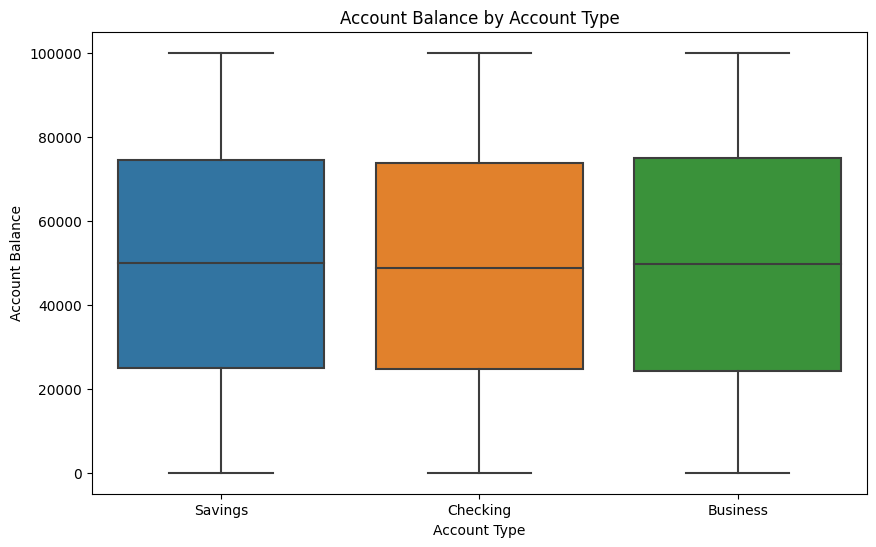

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Account Balance
plt.figure(figsize=(10, 6))
sns.histplot(bank_data['AccountBalance'], bins=30, kde=True)
plt.title('Distribution of Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

# Box plot of Account Balance by Account Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='AccountType', y='AccountBalance', data=bank_data)
plt.title('Account Balance by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Account Balance')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data for prediction
X = bank_data[['AccountBalance', 'DaysSinceLastTransaction']]
y = bank_data['IsActive']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.47      0.52      0.50       950
        True       0.52      0.47      0.49      1050

    accuracy                           0.49      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.49      0.49      2000

